In [1]:
import pandas as pd
wheeler2=pd.read_csv("2w.csv")
wheeler3=pd.read_csv("3w.csv")
wheeler4=pd.read_csv("4wCompanies.csv")
share2w=pd.read_csv("share3.csv")
share3w=pd.read_csv("share2.csv")
share4w=pd.read_csv("share1.csv")

In [2]:
wheeler2.head()

,Year,Number_of_Companies
0,2014,5
1,2015,10
2,2016,20
3,2017,30
4,2018,50


In [3]:
wheeler2=wheeler2.rename(columns={"Number_of_Companies":"2w"})
wheeler3=wheeler3.rename(columns={"Number_of_Companies":"3w"})
wheeler4=wheeler4.rename(columns={"Number_of_Companies":"4w"})

In [4]:
df=pd.concat([wheeler2,wheeler3,wheeler4],axis=1)

In [5]:
df=df.loc[:, ~df.columns.duplicated()]

In [6]:
df

,Year,2w,3w,4w
0,2014,5,10,5
1,2015,10,20,8
2,2016,20,30,12
3,2017,30,50,18
4,2018,50,70,24
5,2019,70,90,35
6,2020,90,120,50
7,2021,150,150,70
8,2022,170,180,95
9,2023,197,200,125


In [7]:
share2w

,Company Name,EV Sales (Units),Market Share (%),Segment,Year
0,Ola Electric,300000,32%,2-Wheelers,2023
1,TVS Motor,200000,21%,2-Wheelers,2023
2,Ather Energy,150000,16%,2-Wheelers,2023
3,Hero Electric,120000,13%,2-Wheelers,2023
4,Bajaj Auto,80000,9%,2-Wheelers,2023
5,Others,90000,9%,2-Wheelers,2023


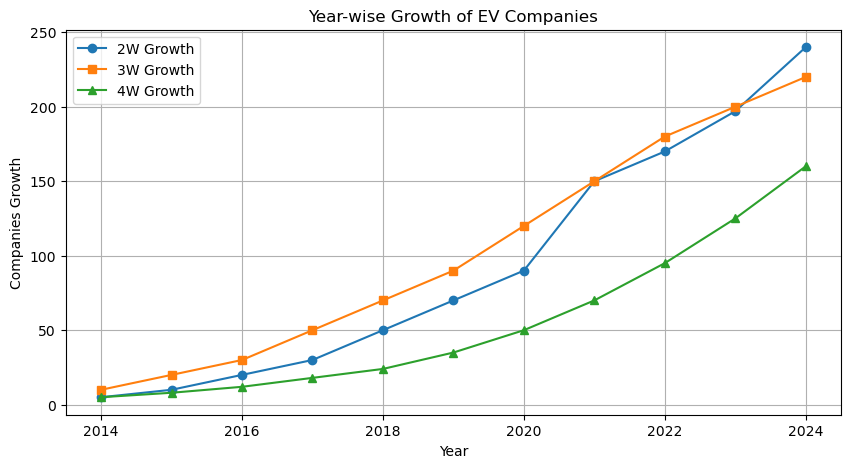

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot growth trends
plt.plot(df["Year"], df["2w"], label="2W Growth", marker="o")
plt.plot(df["Year"], df["3w"], label="3W Growth", marker="s")
plt.plot(df["Year"], df["4w"], label="4W Growth", marker="^")

plt.xlabel("Year")
plt.ylabel("Companies Growth")
plt.title("Year-wise Growth of EV Companies")
plt.legend()
plt.grid()
plt.show()


C:\Users\amark\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amark\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


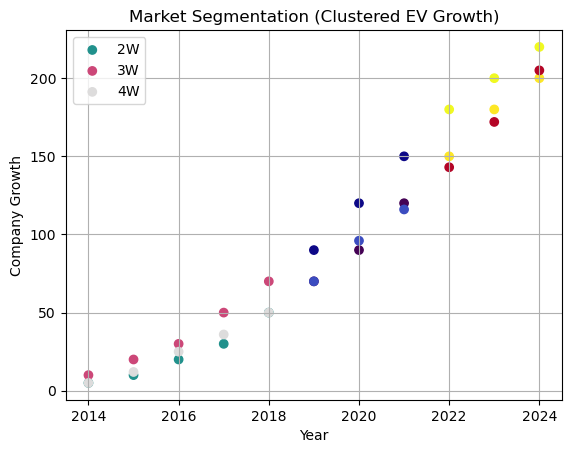

In [33]:
from sklearn.cluster import KMeans

# Prepare data for clustering
X = df[["2w", "3w", "4w"]]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Visualize clusters
plt.scatter(df["Year"], df["2w"], c=df["Cluster"], cmap="viridis", label="2W")
plt.scatter(df["Year"], df["3w"], c=df["Cluster"], cmap="plasma", label="3W")
plt.scatter(df["Year"], df["4w"], c=df["Cluster"], cmap="coolwarm", label="4W")

plt.xlabel("Year")
plt.ylabel("Company Growth")
plt.title("Market Segmentation (Clustered EV Growth)")
plt.legend()
plt.grid()
plt.show()


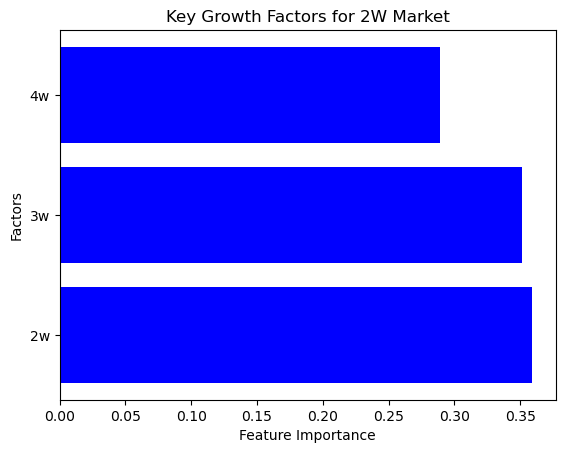

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df.drop(columns=["Year"])
y = df["2w"]  # Predicting 2W growth

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance
importance = model.feature_importances_
features = X.columns

# Plot importance
plt.barh(features, importance, color="blue")
plt.xlabel("Feature Importance")
plt.ylabel("Factors")
plt.title("Key Growth Factors for 2W Market")
plt.show()


In [10]:
model=pd.read_csv('models.csv')

In [11]:
model

,Company,Model,Category,Launch Year
0,Ola Electric,Ola S1,2W,2021.0
1,Ola Electric,Ola S1 Pro,2W,2021.0
2,Ather Energy,Ather 450X,2W,2020.0
3,Ather Energy,Ather 450 Plus,2W,2020.0
4,TVS Motor,TVS iQube,2W,2020.0
5,Hero Electric,Optima CX,2W,2018.0
6,Hero Electric,Photon HX,2W,2019.0
7,Bajaj Auto,Bajaj Chetak,2W,2020.0
8,Revolt Motors,Revolt RV400,2W,2019.0
9,Revolt Motors,Revolt RV300,2W,2020.0


In [12]:
yearly_models =model.groupby(["Launch Year", "Category"]).size().unstack().fillna(0)
print(yearly_models)


Category     Bus   2W   3W   4W  LCV (Commercial)
Launch Year                                      
2017.0       1.0  0.0  0.0  0.0               0.0
2018.0       0.0  1.0  2.0  1.0               0.0
2019.0       1.0  2.0  3.0  2.0               0.0
2020.0       1.0  5.0  1.0  2.0               0.0
2021.0       1.0  2.0  0.0  1.0               1.0
2022.0       0.0  0.0  0.0  1.0               1.0
2023.0       0.0  0.0  0.0  1.0               0.0
2024.0       0.0  0.0  0.0  1.0               0.0


<Figure size 1200x600 with 0 Axes>

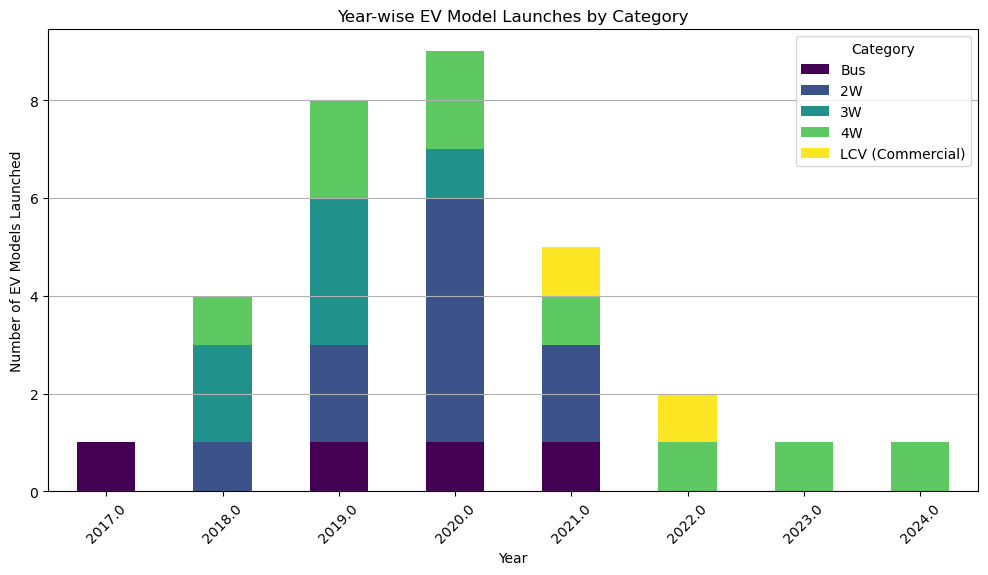

In [13]:
plt.figure(figsize=(12, 6))
yearly_models.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Year")
plt.ylabel("Number of EV Models Launched")
plt.title("Year-wise EV Model Launches by Category")
plt.legend(title="Category")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.show()

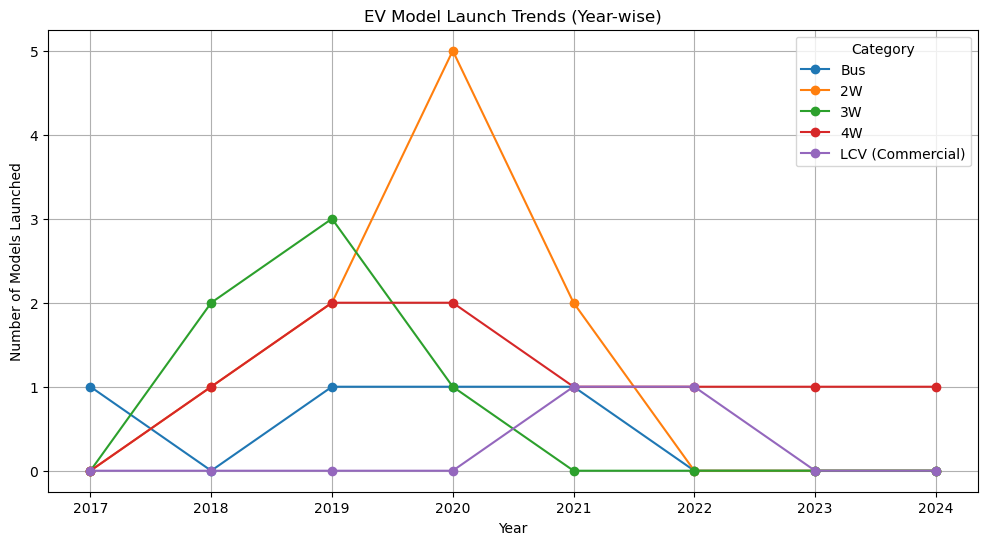

In [14]:
plt.figure(figsize=(12, 6))
for category in yearly_models.columns:
    plt.plot(yearly_models.index, yearly_models[category], marker="o", label=category)
plt.xlabel("Year")
plt.ylabel("Number of Models Launched")
plt.title("EV Model Launch Trends (Year-wise)")
plt.legend(title="Category")
plt.grid()
plt.show()


In [23]:
share1=pd.read_csv('share1.csv')
share1

,Company Name,EV Sales (Units),Market Share (%),Segment,Year
0,Tata Motors,35000,72,Passenger Vehicles,2023
1,MG Motor India,5000,10,Passenger Vehicles,2023
2,Mahindra & Mahindra,3000,6,Passenger Vehicles,2023
3,Hyundai,2000,4,Passenger Vehicles,2023
4,BYD,1000,2,Passenger Vehicles,2023
5,Others,3000,6,Passenger Vehicles,2023


In [39]:
share2=pd.read_csv('share2.csv')
share3=pd.read_csv('share3.csv')

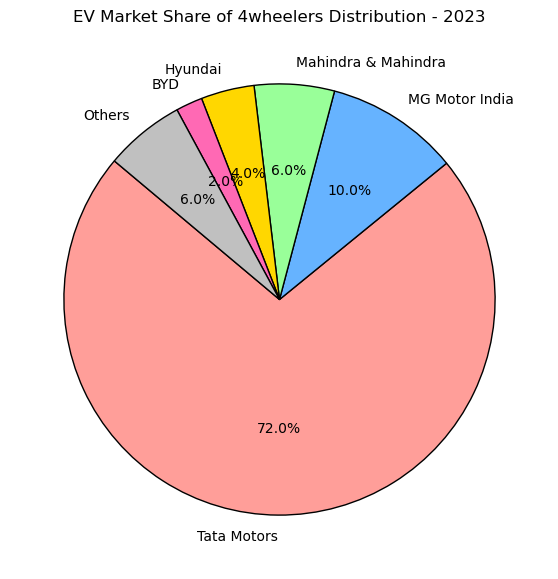

In [43]:
plt.figure(figsize=(7, 7))
plt.pie(share1['Market Share (%)'], labels=share1['Company Name'], autopct="%1.1f%%", startangle=140, colors=["#FF9e99", "#66B3FF", "#99FF99", "#FFD700", "#FF69B4", "#C0C0C0"], wedgeprops={'edgecolor': 'black'})

# Title
plt.title("EV Market Share of 4wheelers Distribution - 2023")
plt.show()

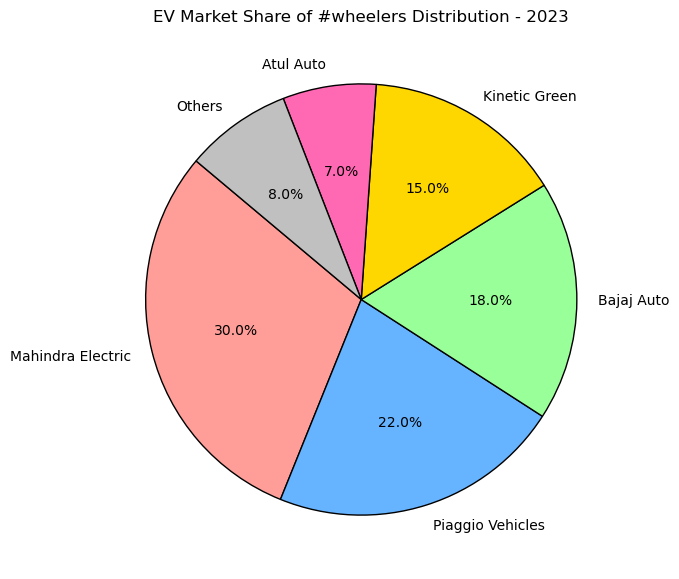

In [44]:
plt.figure(figsize=(7, 7))
plt.pie(share2['Market Share (%)'], labels=share2['Company Name'], autopct="%1.1f%%", startangle=140, colors=["#FF9e99", "#66B3FF", "#99FF99", "#FFD700", "#FF69B4", "#C0C0C0"], wedgeprops={'edgecolor': 'black'})

# Title
plt.title("EV Market Share of #wheelers Distribution - 2023")
plt.show()

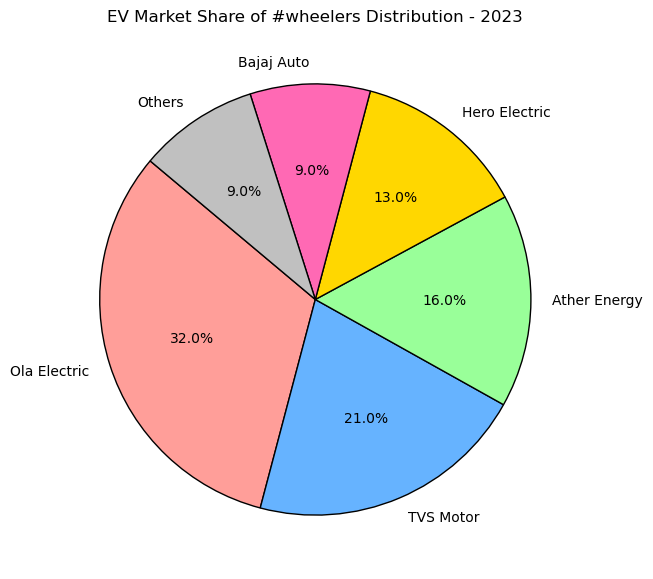

In [45]:
plt.figure(figsize=(7, 7))
plt.pie(share3['Market Share (%)'], labels=share3['Company Name'], autopct="%1.1f%%", startangle=140, colors=["#FF9e99", "#66B3FF", "#99FF99", "#FFD700", "#FF69B4", "#C0C0C0"], wedgeprops={'edgecolor': 'black'})

plt.title("EV Market Share of #wheelers Distribution - 2023")
plt.show()